Source of data : https://www.kaggle.com/karangadiya/fifa19

In [1]:
# Libraries we need

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# CRISP-DM Methology 

# STAGE ONE : Business Understanding

I love football, it is my favorite hobby, and I like to choose data about FIFA. I have intrested to answer questions below,
- 1- What is the distrbuation of player's age?
- 2- What is the distrbuation of player's height ?
- 3- What is the distrbuation of player's weight ?
- 4- Which clubs have the highest average player wage?
- 5- What is the rate of overall of players?
- 6- Who is palyer has the highest overall?

In [2]:
# Read dataset 
fifa19_player_df = pd.read_csv('fifa_data.csv.zip')
fifa19_player_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# STAGE TWO : Data Understanding

In [3]:
# number of rows
fifa19_player_df.shape[0]

18207

In [4]:
# number of columns
fifa19_player_df.shape[1]

89

In [5]:
# check numeric columns 
fifa19_player_df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [6]:
# check datatype
fifa19_player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

# STAGE THREE :  Prepare Data

since we are using one dataset, so we don't need to gather any dataset. 

### so we will start third stage with assessing data.

### Assessing Data

let's check duplicate values in data

In [7]:
# there are 1013 dupl. values
fifa19_player_df.Name.duplicated().sum()

1013

In [8]:
# check unique values for each column 
fifa19_player_df.nunique()

Unnamed: 0                  18207
ID                          18207
Name                        17194
Age                            29
Photo                       18207
Nationality                   164
Flag                          164
Overall                        48
Potential                      47
Club                          651
Club Logo                     679
Value                         217
Wage                          144
Special                      1422
Preferred Foot                  2
International Reputation        5
Weak Foot                       5
Skill Moves                     5
Work Rate                       9
Body Type                      10
Real Face                       2
Position                       27
Jersey Number                  99
Joined                       1736
Loaned From                   341
Contract Valid Until           36
Height                         21
Weight                         57
LS                             93
ST            

there are 1013 duplicate in Name so we need to find who are they? 

In [9]:
fifa19_player_df.Name.value_counts()

J. Rodríguez       11
Paulinho            8
R. Williams         7
J. Williams         7
J. Valencia         6
Felipe              6
J. Hernández        6
J. Gómez            6
L. Rodríguez        5
A. Traoré           5
D. Williams         5
J. Murillo          5
J. Martínez         5
J. Jones            5
M. Gómez            5
L. López            5
M. Smith            5
J. Pérez            5
M. Pedersen         5
J. Torres           5
Danilo              5
A. Ba               4
M. Herrera          4
G. Rodríguez        4
Y. Kobayashi        4
M. Dembélé          4
D. Schmidt          4
M. López            4
J. Aguirre          4
J. Mosquera         4
                   ..
R. Yamamoto         1
Angel Sánchez       1
J. Morias           1
J. Chapman          1
A. Asiri            1
T. Horn             1
W. Orban            1
D. Thøgersen        1
Y. Cabral           1
L. Chiaretti        1
R. Wood             1
F. Lemoine          1
E. Albayrak         1
Lisandro Semedo     1
A. Dursun 

In [10]:
fifa19_player_df.Club.value_counts()

Frosinone                    33
Arsenal                      33
Fortuna Düsseldorf           33
Everton                      33
Rayo Vallecano               33
FC Barcelona                 33
CD Leganés                   33
Atlético Madrid              33
Chelsea                      33
Wolverhampton Wanderers      33
Eintracht Frankfurt          33
AS Monaco                    33
Manchester United            33
Valencia CF                  33
Manchester City              33
Burnley                      33
Newcastle United             33
Tottenham Hotspur            33
TSG 1899 Hoffenheim          33
RC Celta                     33
Liverpool                    33
Borussia Dortmund            33
Cardiff City                 33
Real Madrid                  33
Empoli                       33
Southampton                  33
Bournemouth                  32
Brighton & Hove Albion       32
Levante UD                   32
1. FSV Mainz 05              32
                             ..
Clube Sp

### OK, let's ask ourself is there a duplicate in all data? 

In [11]:
# there are no duplicate in data. 
fifa19_player_df[fifa19_player_df.duplicated()]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause


In [12]:
# Create a function to assign age range
range_of_age = []
for age in fifa19_player_df['Age']:
    if age < 20:    range_of_age.append('Less than 20')
    elif age > 20 and age < 25 :  range_of_age.append('20-25')
    elif age > 25 and age <30 :  range_of_age.append('25-30')
    elif age > 30:  range_of_age.append('More than 30')
    else:           range_of_age.append('Not defiend')
# Create a column from the list
fifa19_player_df['range_of_age'] = range_of_age
# View the new dataframe
print(fifa19_player_df)

       Unnamed: 0      ID                  Name  Age  \
0               0  158023              L. Messi   31   
1               1   20801     Cristiano Ronaldo   33   
2               2  190871             Neymar Jr   26   
3               3  193080                De Gea   27   
4               4  192985          K. De Bruyne   27   
5               5  183277             E. Hazard   27   
6               6  177003             L. Modrić   32   
7               7  176580             L. Suárez   31   
8               8  155862          Sergio Ramos   32   
9               9  200389              J. Oblak   25   
10             10  188545        R. Lewandowski   29   
11             11  182521              T. Kroos   28   
12             12  182493              D. Godín   32   
13             13  168542           David Silva   32   
14             14  215914              N. Kanté   27   
15             15  211110             P. Dybala   24   
16             16  202126               H. Kane 

###  is there any missing data? 

In [13]:
fifa19_player_df.isna().any()

Unnamed: 0                  False
ID                          False
Name                        False
Age                         False
Photo                       False
Nationality                 False
Flag                        False
Overall                     False
Potential                   False
Club                         True
Club Logo                   False
Value                       False
Wage                        False
Special                     False
Preferred Foot               True
International Reputation     True
Weak Foot                    True
Skill Moves                  True
Work Rate                    True
Body Type                    True
Real Face                    True
Position                     True
Jersey Number                True
Joined                       True
Loaned From                  True
Contract Valid Until         True
Height                       True
Weight                       True
LS                           True
ST            

### Cleaning Data

since we are intrested in some columns, so we will choose wanted columns. 

In [14]:
fifa19_filtered = fifa19_player_df.filter(['Name','Nationality','Club','Release Clause','Weight', 'Height','range_of_age', 'Wage' ,'Overall'], axis=1)

In [15]:
fifa19_filtered.head()

,Name,Nationality,Club,Release Clause,Weight,Height,range_of_age,Wage,Overall
0,L. Messi,Argentina,FC Barcelona,€226.5M,159lbs,5'7,More than 30,€565K,94
1,Cristiano Ronaldo,Portugal,Juventus,€127.1M,183lbs,6'2,More than 30,€405K,94
2,Neymar Jr,Brazil,Paris Saint-Germain,€228.1M,150lbs,5'9,25-30,€290K,92
3,De Gea,Spain,Manchester United,€138.6M,168lbs,6'4,25-30,€260K,91
4,K. De Bruyne,Belgium,Manchester City,€196.4M,154lbs,5'11,25-30,€355K,91


Now, we want to convert str column to numeric type by using function below

In [16]:
def convert_stringtonumber(price):
    
    """
    This function converts from price values in string type to float type numbers
    
    Parameter:
    price(str): Price values in string type with M & K as abbreviation for Million and Thousands respectively
    
    Returns:
    float: A float number represents the numerical value of the input parameter price(str)
    """
    
    if price[-1] == 'K':
        return int(price[1:-1])*1000
    elif price[-1] == 'M':
        return float(price[1:-1])*1000000
    else:
        return float(price[1:])

In [17]:
# creating another columns for the engineeered columns with function converting the strings to number
fifa19_filtered['Wage_Number']  = fifa19_filtered['Wage'].map(lambda x: convert_stringtonumber(x))

In [18]:
# One-Hot Encoding for Categorical variables such as Club, Nationality, Preferred Positions
# One-hot encode the feature: "Club" , "Nationality" 
lE = LabelEncoder()
fifa19_filtered['Club_onehot_encode']               = lE.fit_transform(fifa19_filtered['Club'].astype(str))
fifa19_filtered['Nationality_onehot_encode']        = lE.fit_transform(fifa19_filtered['Nationality'].astype(str))

In [19]:
fifa19_filtered[['Club_onehot_encode', 'Nationality_onehot_encode']].head()

,Club_onehot_encode,Nationality_onehot_encode
0,212,6
1,326,123
2,435,20
3,375,139
4,374,13


first we need to replace "'" in height with "," to help us in converting data type 

in weight, replace "lbs" to empty

In [20]:
fifa19_filtered.Height = fifa19_filtered.Height.str.replace("'",".")

In [21]:
fifa19_filtered.Weight = fifa19_filtered.Weight.str.replace("lbs","")

Change data type  to appropriate one and fill na with mean, it is the best choose because we need their record and we can not fill it with zero since no height and weight in zero !!.

In [22]:
fifa19_filtered.Height = fifa19_filtered.Height.astype('float64')

In [23]:
fifa19_filtered.Weight = fifa19_filtered.Weight.astype('float64')

In [24]:
fifa19_filtered.Height = fifa19_filtered.Height.fillna(fifa19_filtered.Height.mean())

In [25]:
fifa19_filtered.Weight = fifa19_filtered.Weight.fillna(fifa19_filtered.Weight.mean())

In [26]:
fifa19_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 12 columns):
Name                         18207 non-null object
Nationality                  18207 non-null object
Club                         17966 non-null object
Release Clause               16643 non-null object
Weight                       18207 non-null float64
Height                       18207 non-null float64
range_of_age                 18207 non-null object
Wage                         18207 non-null object
Overall                      18207 non-null int64
Wage_Number                  18207 non-null float64
Club_onehot_encode           18207 non-null int64
Nationality_onehot_encode    18207 non-null int64
dtypes: float64(3), int64(3), object(6)
memory usage: 1.7+ MB


In [27]:
fifa19_filtered.head()

,Name,Nationality,Club,Release Clause,Weight,Height,range_of_age,Wage,Overall,Wage_Number,Club_onehot_encode,Nationality_onehot_encode
0,L. Messi,Argentina,FC Barcelona,€226.5M,159.0,5.70,More than 30,€565K,94,565000.0,212,6
1,Cristiano Ronaldo,Portugal,Juventus,€127.1M,183.0,6.20,More than 30,€405K,94,405000.0,326,123
2,Neymar Jr,Brazil,Paris Saint-Germain,€228.1M,150.0,5.90,25-30,€290K,92,290000.0,435,20
3,De Gea,Spain,Manchester United,€138.6M,168.0,6.40,25-30,€260K,91,260000.0,375,139
4,K. De Bruyne,Belgium,Manchester City,€196.4M,154.0,5.11,25-30,€355K,91,355000.0,374,13


##  Visualization

In [28]:
fifa19_filtered.nunique()

Name                         17194
Nationality                    164
Club                           651
Release Clause                1244
Weight                          58
Height                          21
range_of_age                     5
Wage                           144
Overall                         48
Wage_Number                    144
Club_onehot_encode             652
Nationality_onehot_encode      164
dtype: int64

### 1-What is the distrbuation of player's age?

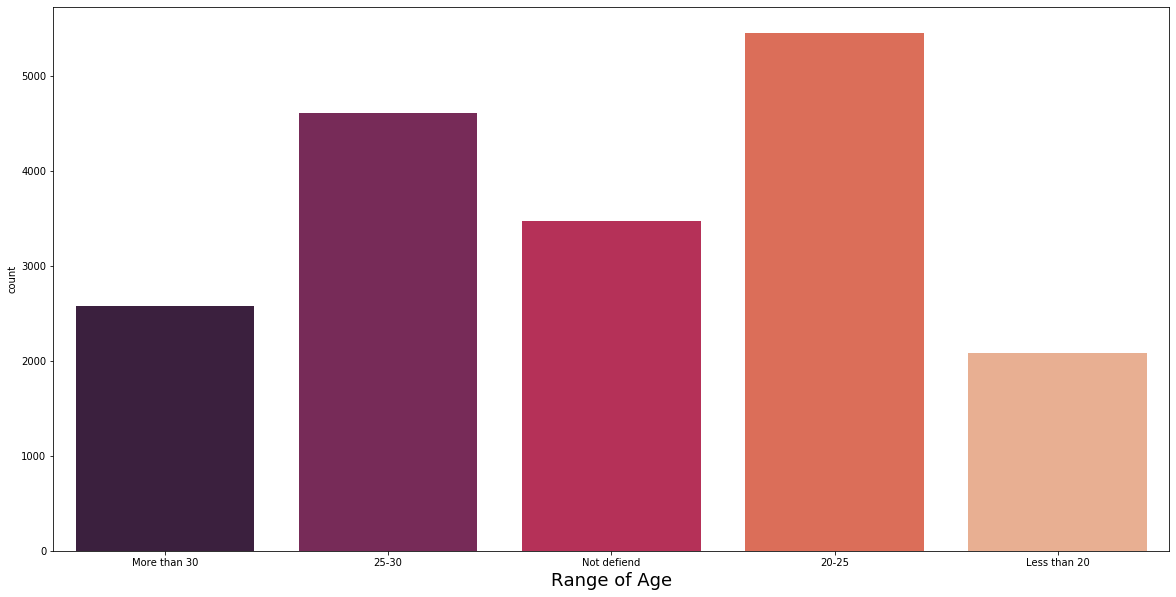

In [35]:
plt.figure(figsize=(20,10))
sns.countplot(fifa19_filtered['range_of_age'], palette='rocket')
plt.xlabel("Range of Age", fontsize=18)
plt.show()

Most of player's age are between 20-30 .

### 2-What is the distrbuation of player's height ?

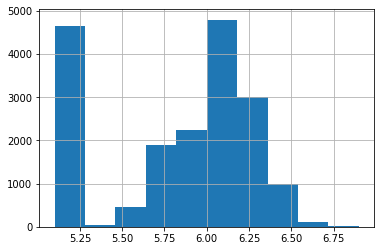

In [29]:
fifa19_filtered.Height.hist()

Most of players their height is between 5.50-6.50 but there are lots of players 5.25

### 3-What is the distrbuation of player's weight ?

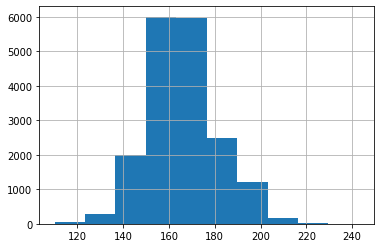

In [30]:
fifa19_filtered.Weight.hist()

Most of players their weight is between 150-180 

### 4-Which clubs have the highest average player wage?

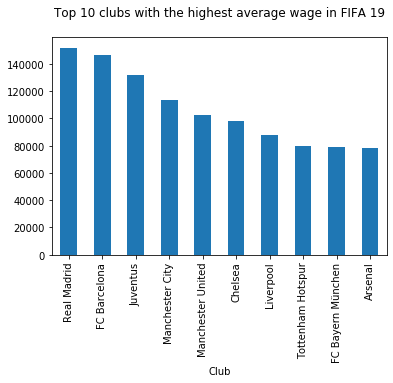

In [32]:
fifa19_filtered.groupby('Club').mean()['Wage_Number'].sort_values(ascending = False).head(10)
fifa19_filtered.groupby('Club').mean()['Wage_Number'].sort_values(ascending = False)[:10].plot.bar()
plt.title("Top 10 clubs with the highest average wage in FIFA 19\n");

Real Madrid and Barcelona player's get a highest average of wage

### 5-What is the rate of overall of players?

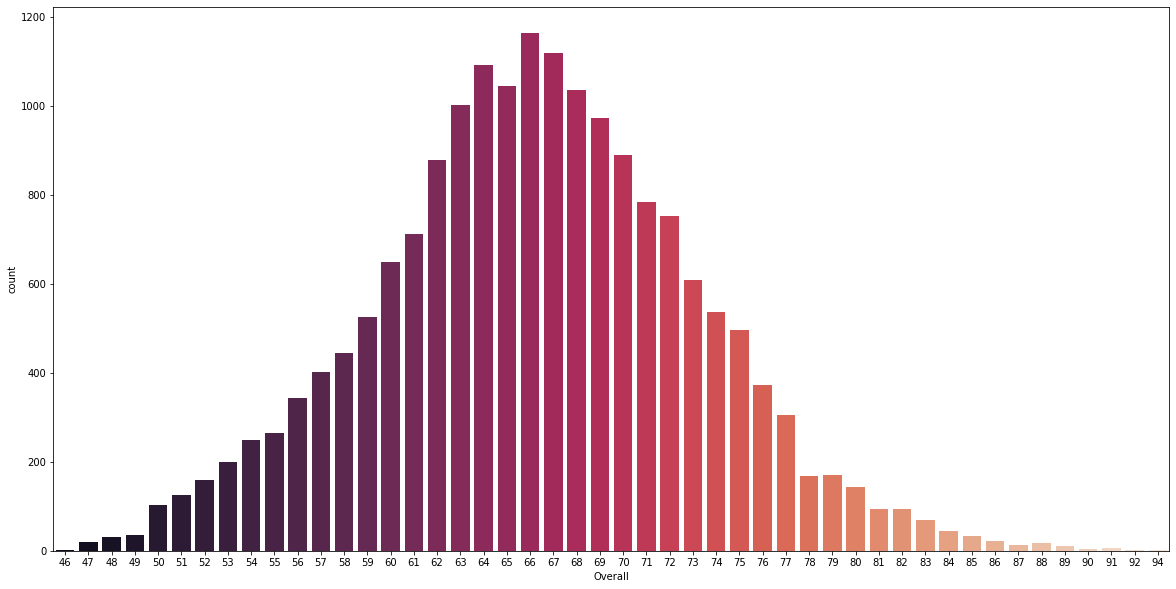

In [33]:
plt.figure(figsize=(20,10))
sns.countplot(fifa19_filtered['Overall'], palette='rocket')
plt.show()

overall of player is a Player Attributes. We can notice the highest is 66 

### 6-Who is palyer has the highest overall?

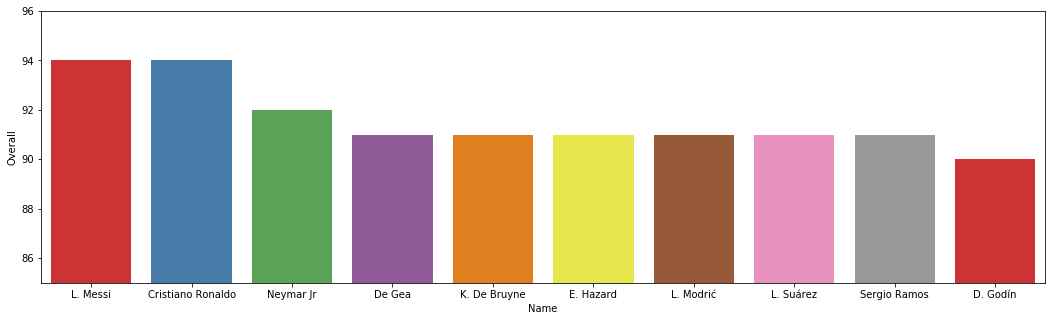

In [34]:
fifa_best_players = pd.DataFrame.copy(fifa19_filtered.sort_values(by = 'Overall' , ascending = False ).head(10))

plt.figure(1 , figsize = (18 , 5))
sns.barplot(x ='Name' , y = 'Overall' , data = fifa_best_players ,palette='Set1')
plt.ylim(85,96)
plt.show()

Messi and Ronaldo have the highest overall.

Source for Rating Range:  https://www.fifplay.com/encyclopedia/player-attributes/